# Analyse semi- und unstrukturierter Daten

# Aufgabe 4 |  Kölner Phonetik

(praktische Aufgabe mit Rechercheanteil, Abgabe Code – mit kurzer Beschreibung der „wie“ in den
ersten Kommentarzeilen, Inputdaten, Beispielsession mit Output)
Suchen Sie im Internet nach einer Implementierung der Kölner oder Heidelberger Phonetik. Testen
Sie das gefundene an einem Beispiel, in dem Sie zu einer gegebenen Liste das passende („gleich
klingende“) Wort aus einer Liste von 5 Wörtern finden.

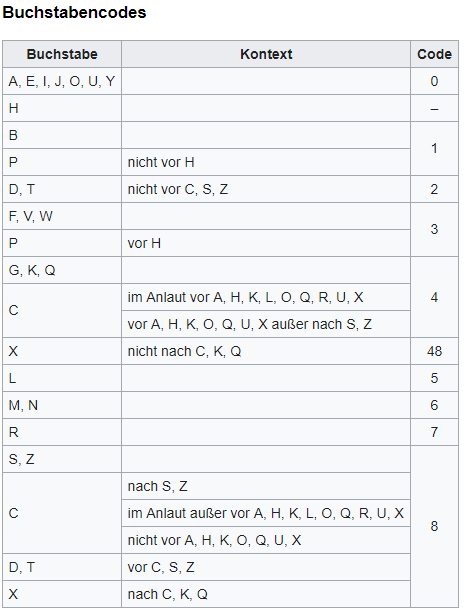

In [36]:
from IPython.display import Image
Image("imgs/table.png") # Source Wikipedia

In [40]:
{re.compile(r".[A|E|I|J|O|U|Y|Ä|Ö|Ü].", re.I):0}

{re.compile(r'.[A|E|I|J|O|U|Y|Ä|Ö|Ü].', re.IGNORECASE|re.UNICODE): 0}

In [22]:
# -*- coding: iso-8859-15 -*-

"""
Dieses Modul stellt eine Implementation
der 'Kölner Phonetik' dar.

"""

import re

RULETABLE = {re.compile(r".[A|E|I|J|O|U|Y|Ä|Ö|Ü].", re.I):     "0",
             re.compile(r".[B].", re.I):                       "1",
             re.compile(r".[P][^H]", re.I):                    "1",
             re.compile(r".[D|T][^C|S|Z]", re.I):              "2",
             re.compile(r".[F|V|W].", re.I):                   "3",
             re.compile(r"[P][H].", re.I):                     "3",
             re.compile(r".[G|K|Q].", re.I):                   "4",
             re.compile(r"[\b][C][A|H|K|L|O|Q]", re.I):        "4",
             re.compile(r"[^S|Z][C][A|H|K|O|Q|U|X]", re.I):    "4",
             re.compile(r"[^C|K|Q][X].", re.I):                "48",
             re.compile(r".[L].", re.I):                       "5",
             re.compile(r".[M|N].", re.I):                     "6",
             re.compile(r".[R].", re.I):                       "7",
             re.compile(r".[S|Z|ß].", re.I):                   "8",
             re.compile(r"[S|Z][C].", re.I):                   "8",
             re.compile(r"\b[C][^A|H|K|L|O|Q|R|U|X]", re.I):   "8",
             re.compile(r".[C][^A|H|K|O|Q|U|X]", re.I):        "8",
             re.compile(r".[D|T][C|S|Z]", re.I):               "8",
             re.compile(r"[C|K|Q][X].", re.I):                 "8"
            }

def encode(string):
    
    encoded = ""
    for i in range(len(string)):
        part = string[i - 1:i + 2]
        if len(string) == 1:
            part = " %s " % string[0]
        elif i == 0:
            part = " %s" % string[:2]
        elif i == len(string) - 1:
            part = "%s " % string[i - 1:]
        for rule, code in RULETABLE.items():
            if rule.match(part):
                encoded += code
                break

    while [v for v in RULETABLE.values() if encoded.find(v * 2) != -1]:
        for v in RULETABLE.values():
            encoded = encoded.replace(v * 2, v)

    if encoded:
        encoded = encoded[0] + encoded[1:].replace("0", "")

    return encoded

In [23]:
print(encode("Maria Miller"))
print(encode("Maria Müller"))
print(encode("Mary Miller"))
print(encode("Maryam Miller"))
print(encode("Maria Meller"))

67657
67657
67657
67657
67657
